In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline  
#内嵌绘画
import numpy as np
import sklearn 
import os
import pandas as pd
import time
import sys   #sys是system的缩写，用来获取操作系统和编译器的一些配置，设置及操作,如判断文件和文件夹是否存在，创建文件文件夹，获取系统版本之类的操作
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl,np,pd,sklearn,tf,keras:
    print(module.__name__,module.__version__)

d:\python3.7.5\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
d:\python3.7.5\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
d:\python3.7.5\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
d:\python3.7.5\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of 

2.0.0-alpha0
sys.version_info(major=3, minor=7, micro=5, releaselevel='final', serial=0)
matplotlib 3.1.1
numpy 1.17.3
pandas 0.25.2
sklearn 0.21.3
tensorflow 2.0.0-alpha0
tensorflow.python.keras.api._v2.keras 2.2.4-tf


d:\python3.7.5\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
d:\python3.7.5\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
d:\python3.7.5\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
d:\python3.7.5\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:544: FutureWarning: Passing (type, 1)

In [2]:
from sklearn.datasets import fetch_california_housing

housing=fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
from sklearn.model_selection import train_test_split

x_train_all,x_test,y_train_all,y_test=train_test_split(housing.data,housing.target,random_state=7)
x_train,x_valid,y_train,y_valid=train_test_split(x_train_all,y_train_all,random_state=11)
print(x_train.shape,y_train.shape)
print(x_valid.shape,y_valid.shape)
print(x_test.shape,y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [4]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_valid_scaled=scaler.transform(x_valid)
x_test_scaled=scaler.transform(x_test)

In [7]:
#funcation API 

input=tf.keras.layers.Input(shape=x_train.shape[1:])
hidden1=tf.keras.layers.Dense(30,activation='relu')(input)
hidden2=tf.keras.layers.Dense(20,activation='relu')(hidden1)
#f(x)=h(g(x))
concat=tf.keras.layers.concatenate([input,hidden2])
output=tf.keras.layers.Dense(1)(concat)
model=tf.keras.models.Model(inputs=[input],outputs=[output])

model.summary()



Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           270         input_3[0][0]                    
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 20)           620         dense_6[0][0]                    
__________________________________________________________________________________________________
concatenate_2 (Concatenate)     (None, 28)           0           input_3[0][0]                    
                                                                 dense_7[0][0]                

In [9]:
model.compile(optimizer='adam',loss='mse',metrics=["acc"])

callbacks=[keras.callbacks.EarlyStopping(patience=5,min_delta=1e-3)]


In [10]:
history = model.fit(x_train_scaled,y_train,validation_data=(x_valid_scaled,y_valid) ,epochs=100,callbacks=callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 75us/sample - loss: 1.3065 - acc: 0.0029 - val_loss: 0.5818 - val_acc: 0.0021
Epoch 2/100
11610/11610 [==============================] - 0s 31us/sample - loss: 0.5108 - acc: 0.0030 - val_loss: 0.4360 - val_acc: 0.0021
Epoch 3/100
11610/11610 [==============================] - 0s 30us/sample - loss: 0.4034 - acc: 0.0030 - val_loss: 0.4012 - val_acc: 0.0023
Epoch 4/100
11610/11610 [==============================] - 0s 30us/sample - loss: 0.3817 - acc: 0.0031 - val_loss: 0.3848 - val_acc: 0.0023
Epoch 5/100
11610/11610 [==============================] - 0s 31us/sample - loss: 0.3698 - acc: 0.0031 - val_loss: 0.3775 - val_acc: 0.0023
Epoch 6/100
11610/11610 [==============================] - 0s 29us/sample - loss: 0.3587 - acc: 0.0030 - val_loss: 0.3703 - val_acc: 0.0023
Epoch 7/100
11610/11610 [==============================] - 0s 29us/sample - loss: 0.3506 - acc: 0.0031 - val_lo

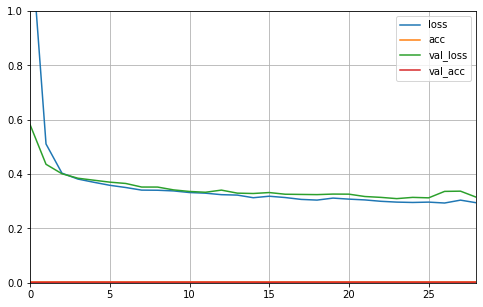

In [11]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
plot_learning_curves(history)

In [ ]:
model.evaluate(x_test_scaled,y_test)